In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
R = 2585e3 # N #CHECK
vs = 25.5*0.5144 # m/s #CHECK
vend = 21*0.5144 # m/s #CHECK
n_p = 176.9*(1/60) # rot/s #CHECK
n_eHP = 5957*(1/60) #CHECK
n_eLP = 4403*(1/60) #CHECK
kp = 2 #CHECK
ke = 1 #CHECK
t = 0.05 #CHECK
w = 0.045 #CHECK
eta_O = 0.68 #CHECK 
eta_R = 0.98 #CHECK
eta_S = 0.99 #CHECK
eta_GB = 0.99 #CHECK
eta_e = 0.29 #CHECK
delta = 40092*1e3 # kg #CHECK
rho = 1025 # kg/m^3 #CHECK
h_L = 42700e3 # j/kg #CHECK

In [3]:
P_E = R*vs
print('Effective Power P_E = ', P_E/1000, 'kW')
eta_H = (1 - t)/(1 - w)
print('Hull efficiency eta_H: ', eta_H)
P_T = P_E / (kp*eta_H)
print('Thrust power per propeller P_T: ', P_T/1000, 'kW')
P_O = P_T / eta_O
print('Open water propeller power per propeller P_O: ', P_O/1000, 'kW')
P_p = P_O / eta_R
print('Propeller power per propeller P_p: ', P_p/1000, 'kW')
P_d = P_p * kp
print('Delivered power P_d: ', P_d/1000, 'kW')
eta_D = eta_O*eta_H*eta_R
P_s = P_p / eta_S
print('Shaft power per propeller P_s: ', P_s/1000, 'kW')
print('Total Shaft power kp*P_s: ', kp*P_s/1000, 'kW')
P_B = P_s / (eta_GB*ke)
print('Break power per engine P_b: ', P_B/1000, 'kW')
print('Total Break power : kp*P_b', kp*P_B/1000, 'kW')  #TODO: not true if ke =! 1
Qdot_F = P_B / (eta_e)
print('Heat input per engine: ', Qdot_F/1000, 'kW')
print('Propulsive efficiency eta_D: ', eta_D)
eta_TRM = eta_S * eta_GB
print('Transmission efficiency eta_TRM: ', eta_TRM)
eta_all = eta_H*eta_O*eta_R*eta_S*eta_GB*eta_e
print('fraction of fuel energy converted to towing power: ', P_E/(kp*ke*Qdot_F), '=', eta_all)
C_E = P_E / (rho**(1/3) * delta**(2/3) * vs**3)
print('C_E: ', C_E)
C_D = C_E / eta_D
print('C_D: ', C_D)
T = P_T / ((1-w)*vs)
print('Thrust per prop T: ', T/1000, 'kN')
Q = P_O / (2*np.pi*n_p)
print('Open water torque: ', Q/1000, 'kN-m')
M_P = P_p / (2*np.pi*n_p)
print('Torque delivered to one prop: ', M_P/1000, 'kN-m')
M_s = P_s / (2*np.pi*n_p)
print('Shaft torque delivered to one prop: ', M_s/1000, 'kN-m')
M_B = P_B / (2*np.pi*n_eHP)
M_B_HP = (P_B/2) / (2*np.pi*n_eHP)
M_B_LP = (P_B/2) / (2*np.pi*n_eLP)
print('Engine torque: ', M_B/1000, '(DONT USE FOR PSET) kN-m')
print('HP Engine torque M_B_HP: ', M_B_HP/1000, 'kN-m')
print('HP Engine torque M_B_LP: ', M_B_LP/1000, 'kN-m')
mdot_f = Qdot_F/h_L
print('fuel mass flow rate: ', mdot_f, 'kg/s')
c1 = R / vs**2
print('c1: ', c1)
LWL_feet = 777
vs_H_knots = 1.34*np.sqrt(LWL_feet)
print('Vs_H = ', vs_H_knots, 'knots')

print('Alternative P_B_total: ', P_E/(1000*eta_H*eta_O*eta_R*eta_S*eta_GB), 'kW')

Effective Power P_E =  33907.962 kW
Hull efficiency eta_H:  0.9947643979057592
Thrust power per propeller P_T:  17043.212478947367 kW
Open water propeller power per propeller P_O:  25063.547763157894 kW
Propeller power per propeller P_p:  25575.048737916215 kW
Delivered power P_d:  51150.09747583243 kW
Shaft power per propeller P_s:  25833.382563551735 kW
Total Shaft power kp*P_s:  51666.76512710347 kW
Break power per engine P_b:  26094.32582176943 kW
Total Break power : kp*P_b 52188.65164353886 kW
Heat input per engine:  89980.43386817045 kW
Propulsive efficiency eta_D:  0.662910994764398
Transmission efficiency eta_TRM:  0.9801
fraction of fuel energy converted to towing power:  0.18841852913089005 = 0.18841852913089005
C_E:  0.012720333482594322
C_D:  0.019188599349019994
Thrust per prop T:  1360.526315789474 kN
Open water torque:  1352.9635448026215 kN-m
Torque delivered to one prop:  1380.5750457169606 kN-m
Shaft torque delivered to one prop:  1394.5202481989502 kN-m
Engine torque

Thrust per prop T0:  1360.526315789474 kN
vA:  12.526925999999998
c6:  0.4685524341527923
0.2118427511814445
optimum Dp =  5.5905474398262465  m


<IPython.core.display.Javascript object>


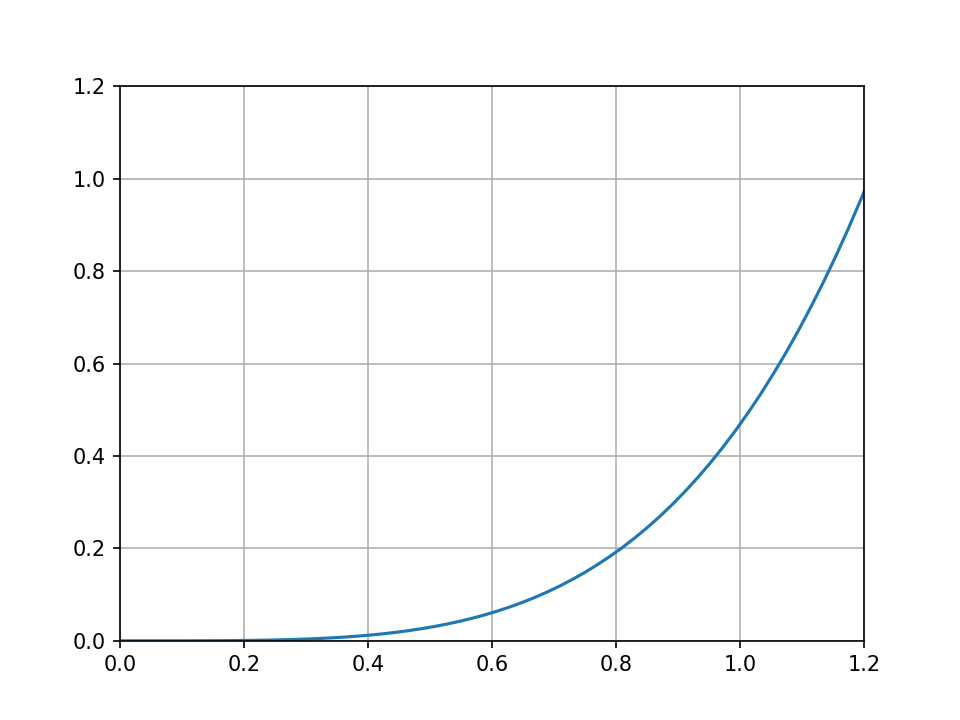

(0.0, 1.2)

In [14]:
%matplotlib notebook
T0 = (R*vs/(kp*eta_H))/((1-w)*vs)
print('Thrust per prop T0: ', T0/1000, 'kN')
vA = (1-w)*vs
print('vA: ', vA)
c6 = T0*n_p**2/(rho*vA**4)
Jarray = np.linspace(0, 1.6, 80)
print('c6: ', c6)
KTship = c6*Jarray**4
print(c6*0.82**4)
Jopt = 0.76  # TODO: change me
KTopt = .16
KQopt = 0.028
Dopt = (1-w)*vs/(n_p*Jopt)
print('optimum Dp = ', Dopt, ' m')
plt.plot(Jarray, KTship)
plt.grid()
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)

In [9]:
i_HP = n_eHP / n_p
print('HP Gearbox ratio i_HP = ', i_HP)
i_LP = n_eLP / n_p
print('LP Gearbox ratio i_LP = ', i_LP)
eta_O_opt = KTopt*Jopt/(2*np.pi*KQopt)
print('eta_O_opt: ', eta_O_opt)
print('eta_H ', eta_H)
eta_D_opt = eta_O_opt*((1-t)/(1-w))*eta_R
print('eta_D_opt: ', eta_D_opt)

P_p_opt = (1-w)*vs*T0 / (eta_O_opt*eta_R)
print('P_p_opt: ', P_p_opt/1000, ' kW')
P_b_opt = P_p_opt/(eta_S*eta_GB*ke)
print('P_b_opt', P_b_opt/1000, ' kW')
KT_calc = T0/(rho*n_p**2*Dopt**4)
print('KT_calc: ', KT_calc)
Q_calc = T0*(1-w)*vs/(2*np.pi*eta_O_opt*n_p)
print('Q_calc: ', Q_calc/1000, 'kN m')
KQ_calc = Q_calc/(rho*n_p**2*Dopt**5)
print('KQ_calc: ', KQ_calc)

HP Gearbox ratio i_HP =  33.6743923120407
LP Gearbox ratio i_LP =  24.889768230638776
eta_O_opt:  0.6909196941283455
eta_H  0.9947643979057592
eta_D_opt:  0.6735562672601987
P_p_opt:  25170.845887847077  kW
P_b_opt 25681.91601657696  kW
KT_calc:  0.21184275118144447
Q_calc:  1331.5805270632227 kN m
KQ_calc:  0.04001474188982841


<IPython.core.display.Javascript object>


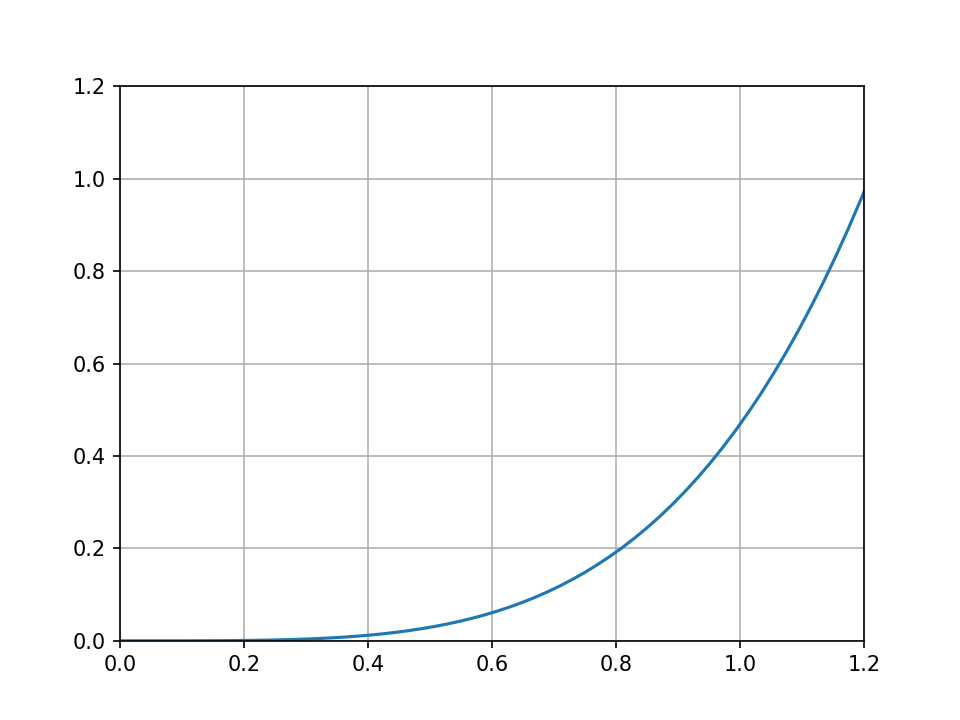

In [13]:
# Part 2: controllable pitch propeller 
fig, ax = plt.subplots()
# ax.set_xticks(np.arange(0.2, 1.2, 0.2), minor=False)
# ax.set_yticks(np.arange(0.2, 1.2, 0.2), minor=False)
ax.yaxis.grid(True, which='major')
ax.xaxis.grid(True, which='major')
plt.plot(Jarray, KTship)
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show()

In [15]:
Jopt = 0.85  # TODO: change me
KTopt = .25
KQopt = 0.05
Dopt = (1-w)*vs/(n_p*Jopt)
print('optimum Dp = ', Dopt, ' m')

optimum Dp =  4.998607122668173  m


In [16]:
eta_O_opt = KTopt*Jopt/(2*np.pi*KQopt)
print('eta_O_opt: ', eta_O_opt)
eta_D_opt = eta_O_opt*((1-t)/(1-w))*eta_R
print('eta_D_opt: ', eta_D_opt)

P_p_opt = (1-w)*vs*T0 / (eta_O_opt*eta_R)
print('P_p_opt: ', P_p_opt/1000, ' kW')
P_b_opt = P_p_opt/(eta_S*eta_GB*ke)
print('P_b_opt', P_b_opt/1000, ' kW')
KT_calc = T0/(rho*n_p**2*Dopt**4)
print('KT_calc: ', KT_calc)
Q_calc = T*(1-w)*vs/(2*np.pi*eta_O_opt*n_p)
print('Q_calc: ', Q_calc/1000, 'kN m')
KQ_calc = Q_calc/(rho*n_p**2*Dopt**5)
print('KQ_calc: ', KQ_calc)

eta_O_opt:  0.6764085081405552
eta_D_opt:  0.6594097602919967
P_p_opt:  25710.84327367632  kW
P_b_opt 26232.87753665577  kW
KT_calc:  0.24458729908047103
Q_calc:  1360.1473065365508 kN m
KQ_calc:  0.04891745981609421
